# Introduction to data Science. Exercise 1

## Bussiness Understanding

* Background: 
    Data scientist working for a company that provides car fleet maintenance services
* Bussiness objective: 
    How can we add value to the company by analyzing data from historic gasoline prices in Germany?

## Understanding the Data

In this Part I'm going to focus on loading the Data from both stations and prices samples. Also exploring the data and 
checking the quality of it.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [107]:
data_st = pd.read_csv('example_sprit_cut_station.csv', sep=";")
data_pr = pd.read_csv('example_sprit_cut_prices.csv', sep=";")

In [108]:
data_pr.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [109]:
data_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [110]:
data_pr.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


* We can observe negative min value, we would need later to remove these rows as the information is not valid
* Max values for E5 and E10 are out of "normal" range. To drop
* CHANGED column doesn't provide info to dop. DATE_CHANGED column gives us detailed information about the change.

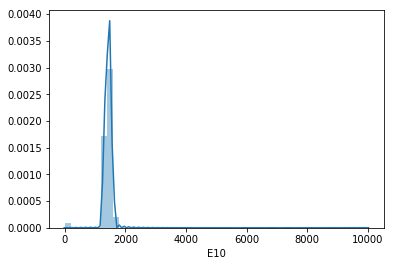

In [111]:
sns.distplot(data_pr['E10'])

* we can delimit the ranges of the prices, after visualazing like in the above graphic something between 1000 and 2000

In [112]:
data_st.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [113]:
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [114]:
data_st.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


* There are some missing information in BRAND, this can be filled with Unknown value
* VERSION, VERSION_TIME,PUBLIC_HOLIDAY_IDENTIFIER does not provide with meaningfull info for this exercise. To Drop
* Almost 20% of HOUSE_NUMBER data is missing, In this case is better to drop this column too
* LAT and LNG can be used to locate the station, so we can drop STREET, PLACE, POSTCODE

## Data preparation

### Clean the data

I'm dropping the columns containing non-important info for the exercise,also data cleaning is necessary 
and merging data for later analysis.

In [115]:
data_st.drop_duplicates(inplace=True)
data_pr.drop_duplicates(inplace=True)

We can Merge both data and continue cleaning from there after dropping duplicate data

In [116]:
data = pd.merge(data_pr,data_st,left_on='STID',right_on= 'ID',how='inner')
data.drop(columns=['ID'], inplace= True)
data.shape

(1094763, 17)

In [117]:
to_drop_st = ['VERSION','VERSION_TIME','HOUSE_NUMBER','PUBLIC_HOLIDAY_IDENTIFIER',
              'CHANGED', 'STREET', 'POST_CODE', 'PLACE']
data.drop(to_drop_st,inplace=True,axis=1)

In [118]:
data.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,NAME,BRAND,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847


Drop values that look too wide from the mean, which would mean erroneous values. Also convert prices to Euro unit.

In [119]:
data.drop(data[(data.E5>2000)|(data.E5<1000)].index,inplace=True,axis=0)
data.drop(data[(data.E10>1800)|(data.E10<1000)].index,inplace=True,axis=0)
data.drop(data[(data.DIESEL>1800)|(data.DIESEL<800)].index,inplace=True,axis=0)

data['E10'] = data['E10'].apply(lambda x:  x/1000)
data['E5'] = data['E5'].apply(lambda x:  x/1000)
data['DIESEL'] = data['DIESEL'].apply(lambda x:  x/1000)

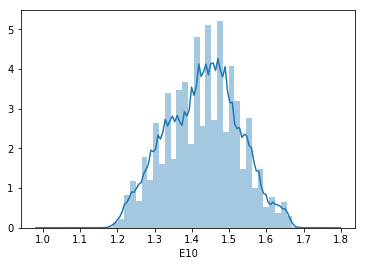

In [120]:
sns.distplot(data['E10'])

Drop rows with empty Brand Values and 'not active'

In [121]:
data.dropna(subset=['BRAND'], inplace=True)
data.drop(data[(data.NAME=='nicht mehr aktiv')].index, inplace=True,axis=0)

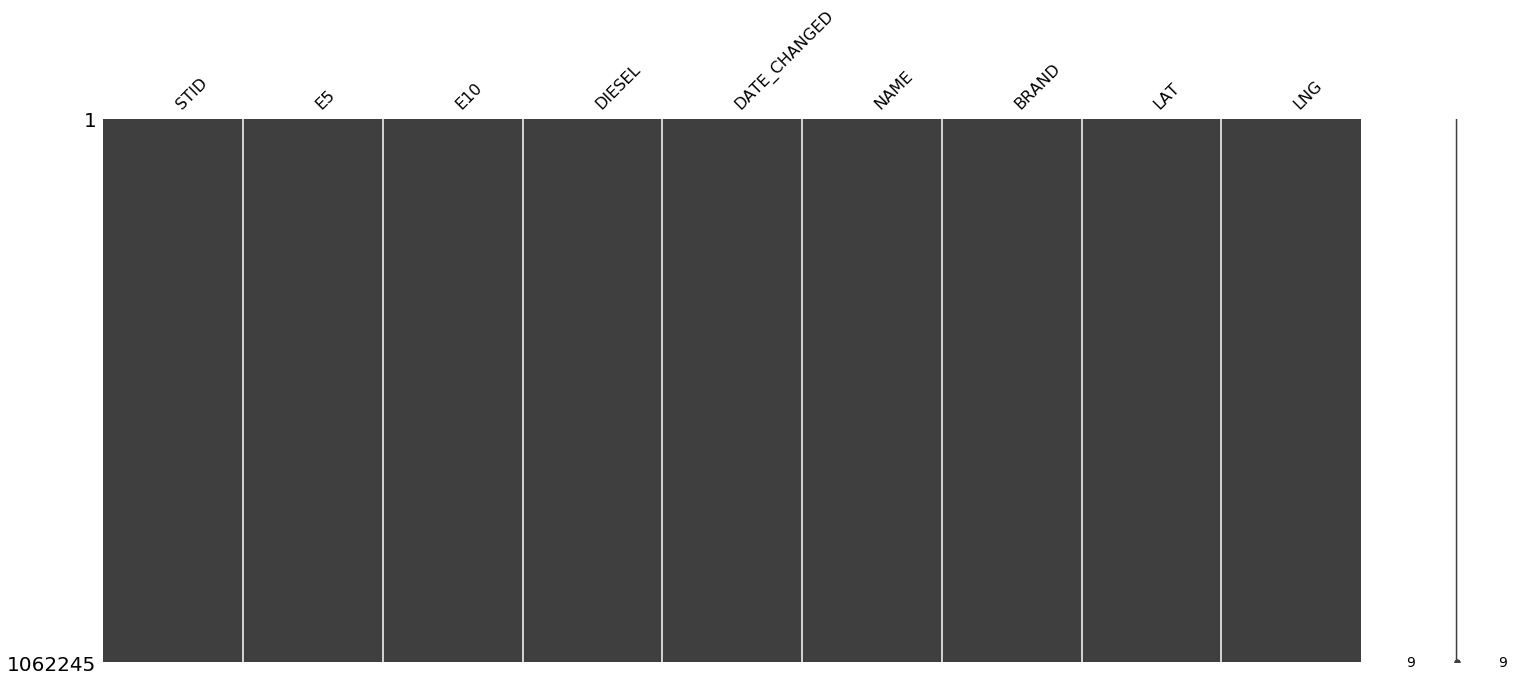

In [122]:
ms.matrix(data)